# Final Exam (part 2) - Computational Physics I

### Deadline: Friday 13 December 2024 (by 17h00)
### Credits: 10 points

### Please keep the structure provided below and submit an organised notebook with clear answers to each item.

## Name:

## 2. Monte Carlo simulations: Cosmology (10 points) 

Supernovae type Ia (SN Ia) are very energetic astronomical explosions, which have a very similar intrinsic known brightness (i.e. they have a very similar absolute magnitude $M$), so they can be used as cosmological "standard candles" to measure the luminosity distance, $d$, as a function of redshift, $z$:

\begin{equation}
d=\frac{cz}{H_0}
\end{equation}

where $c$ is the speed of light and $H_0$ is the Hubble constant. Since they have similar absolute magnitudes $M$, we can estimate distances by comparing how bright or faint they appear on the sky as indicated by the measured apparent magnitude, $m$, which does differ:

\begin{equation}
m=M+5\log\left(\frac{d}{\rm Mpc}\right)+25
\end{equation}

Higher $m$ values imply objects are fainter; lower $m$ values imply objects are brighter. Same for $M$. Unfortunately, selection effects associated with instrumental limitations can bias our measurements. For example, far-away SN Ia can be so faint that they may not be detectable, so the sample will be biased towards brighter objects. In the equation above $\rm Mpc$ stands for Mega parsecs, which are distance units used in cosmology.

**Therefore, to understand selection bias, we want to simulate this effect using a Monte Carlo simulation.**

The purpose of this problem is to determine the bias as a function of redshift for a sample of objects (SN Ia) via a Monte Carlo calculation. To set up your simulation, assume that:

- $H_0 = 70\,\rm km\,s^{-1}\,Mpc^{-1}$

- the absolute magnitude of SN Ia $M=-19.5\,\rm mag$.

- your supernova search will be able to detect $100$% of objects as faint as $m=18.5\,\rm mag$, and none fainter. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots 

In [2]:
# set plot style
plt.style.use(['science', 'notebook', 'no-latex'])


(a) Write a python function to generate $N$ Gaussian random variables with mean $\langle M\rangle=-19.5\,\rm mag$ and different standard deviations ($\sigma_M=0.1$, $0.2$, and $0.5\,\rm mag$).

In [3]:
def GaussianRandomN(N, sigma_M):
    """
    Generate N random numbers from a Gaussian 
    distribution with mean M and standard deviation sigma_M.

    Arguments:
            - N (int)        : number of random numbers to generate
            - sigma_M (list) : standard deviation of the Gaussian distribution

    Returns:
            - random_N (list) : list of random numbers
    """
    M = -19.5 # mag 
    random_N = np.random.normal(M, sigma_M, N)

    return random_N

(b) Make $3$ plots of $M$ versus $N$, where $N$ is the number of generated objects, one for each $\sigma_M$.

In [4]:
# Sigma values
M = -19.5 # mag
sigma_M = [0.1, 0.2, 0.5]
N = 10000

In [5]:
def RandomNPlot(N, sigma_M):
    """
    Plot the distribution of N random variables N(M, sigma)
    for different values of sigma.

    Arguments:
            - N (int)        : number of random numbers to generate
            - sigma_M (list) : standard deviation of the Gaussian distribution

    Returns:
            - Plot of the distribution of N random variables N(M, sigma)
    """
    random_N_1 = GaussianRandomN(N, sigma_M[0])
    random_N_2 = GaussianRandomN(N, sigma_M[1])
    random_N_3 = GaussianRandomN(N, sigma_M[2])
    n_vec = N * np.ones(N)

    fig, ax = plt.subplots(1, 3, figsize = (12, 6), sharey = True)
    fig.suptitle(r"Distribution of $N$ random variables $N(M= -19.5, \sigma)$", fontsize = 20)
    fig.supxlabel(rf"$N$ = {N}", fontsize = 15)
    fig.supylabel(r"$N(M, \sigma)$", fontsize = 15)

    ax[0].scatter(n_vec, random_N_1, color = "crimson", label = r"$\sigma= 0.1$")
    ax[0].grid(linestyle = "--")
    ax[0].legend(frameon = True)

    ax[1].scatter(n_vec, random_N_2, color = "darkviolet", label = r"$\sigma= 0.2$")
    ax[1].grid(linestyle = "--")
    ax[1].legend(frameon = True)

    ax[2].scatter(n_vec, random_N_3, color = "darkblue", label = r"$\sigma= 0.5$")
    ax[2].grid(linestyle = "--")
    ax[2].legend(frameon = True)

    plt.tight_layout()
    plt.show()
    plt.close()

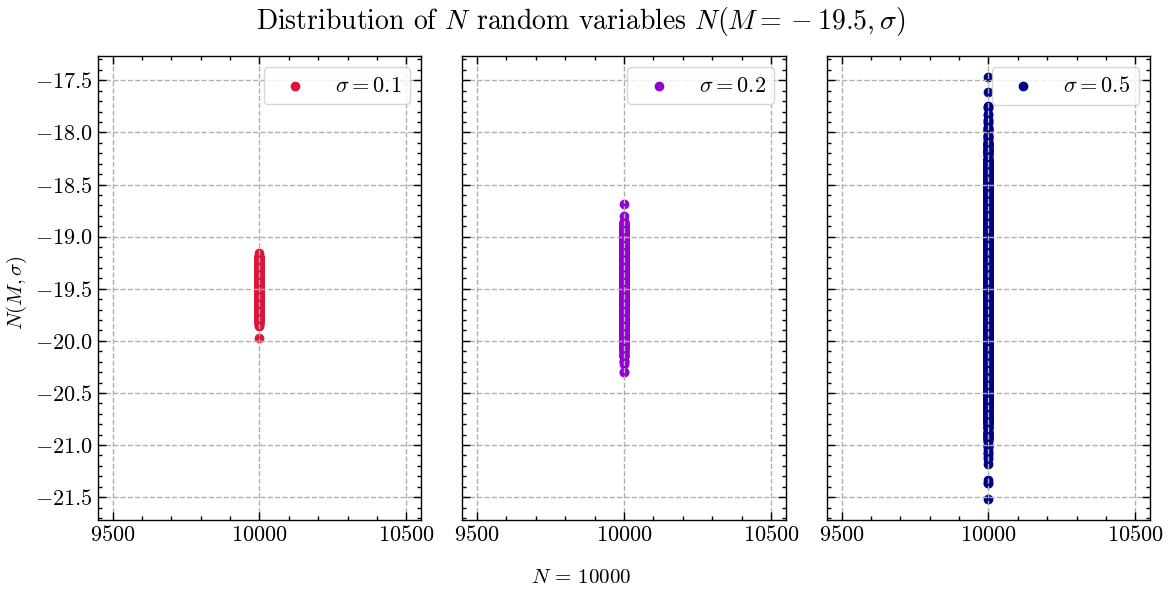

In [6]:
# call the function
RandomNPlot(N, sigma_M)

(c) Write a python function to calculate and return:

- the luminosity distances, $d$, in $\rm Mpc$ given redshifts between $z=0$ and $z=0.1$.

- the apparent magnitudes, $m$, for the same redshift range.

In [7]:
# Define constants
c = 3*10**6 # km/s
H0 = 70 # km s^-1 Mpc^-1

In [8]:
def DistanceMagnitude(sigma, N):
    """
    Calculate the luminosity distance and apparent magnitude
    for a given set of random numbers and sigma values.

    Arguments:
            - sigma (float) : standard deviation of the Gaussian distribution
            - N (int)       : number of random numbers to generate
    
    Returns:
            - d (np.array) : luminosity distance in Mpc
            - m (np.array) : apparent magnitude
            - z (np.array) : redshift
    """
    # generate random numbers
    random_n = GaussianRandomN(N, sigma)

    # Construct the z-vector spanning from 0 to 0.1
    z = 0.1 * (random_n - np.min(random_n)) / (np.max(random_n) - np.min(random_n))

    # Calculate the luminosity distance
    d = c * z / H0 # Mpc

    # Apparent magnitude
    m = M + 5 * np.log10(d) + 25 # mag

    return d, m, z

(d) Write a python function that:

- reads the resulting $m$ values from item (c),

- removes values with apparent magnitudes larger than the detection threshold $m=18.5\,\rm mag$, 

- re-calculates the mean observed magnitude $\langle M_{\rm observed}\rangle$ of the SN Ia from the actually detected objects for the same redshift range.

- returns the bias as a function of redshift. The bias in $M$ can be calculated with:

\begin{equation}
|\Delta M|=|\langle M_{\rm observed}\rangle  - \langle M\rangle|
\end{equation}


In [9]:
def BiasFunction(d, m, z):
    """
    Function to remove values larger than m = 18.5 mag, 
    recalculates the mean observed magnitude and calculates the bias.

    Arguments:
            - d (np.array) : luminosity distance in Mpc
            - m (np.array) : apparent magnitude
            - z (np.array) : redshift

    Returns:
            - M_bias (np.array)      : bias
            - M_observed (np.array)  : mean observed magnitude
    """
    # Remove values larger than m = 18.5 mag 
    m_clean = np.where(m <= 18.5, m, np.nan)

    # Recalculate the mean observed magnitude
    M_observed = m_clean + 5 * np.log10(d) + 25

    # Calculate the bias
    M_bias = np.abs(M_observed - M)

    return M_bias, M_observed

(e) Make $3$ plots of $m$ versus $N$, where $N$ is the number of generated objects, one for each $\sigma_M=0.1$, $0.2$, and $0.5\,\rm mag$, showing the detection threshold and colouring distinctly the objects that would not be detected.

In [10]:
d_1, m_1, z_1 = DistanceMagnitude(sigma_M[0], N)
d_2, m_2, z_2 = DistanceMagnitude(sigma_M[1], N)
d_3, m_3, z_3 = DistanceMagnitude(sigma_M[2], N)

/tmp/ipykernel_672089/3641034299.py:25: RuntimeWarning: divide by zero encountered in log10
  m = M + 5 * np.log10(d) + 25 # mag


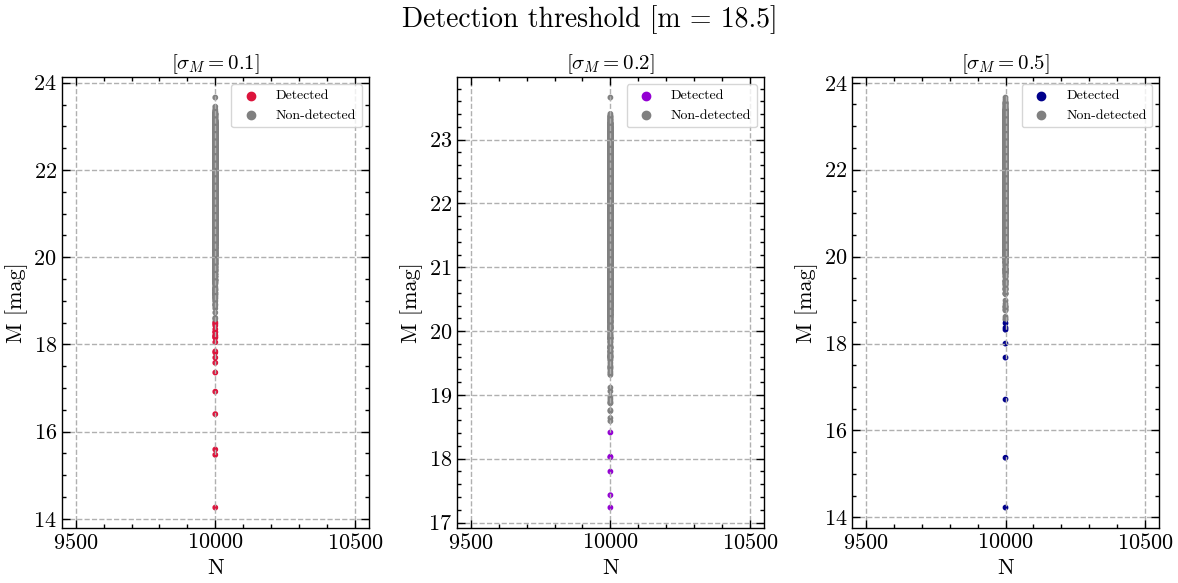

In [11]:
n_vec = N * np.ones(N)
colors1 = np.where(m_1 <= 18.5, 'crimson', 'gray')
colors2 = np.where(m_2 <= 18.5, 'darkviolet', 'gray')
colors3 = np.where(m_3 <= 18.5, 'darkblue', 'gray')


fig, ax = plt.subplots(1, 3,figsize = (12, 6))
fig.suptitle("Detection threshold [m = 18.5]", fontsize = 20)


ax[0].scatter(n_vec, m_1, color = colors1, s = 10)
ax[0].scatter([], [], color='crimson', label='Detected')
ax[0].scatter([], [], color='gray', label='Non-detected')
ax[0].set_title(rf"[$\sigma_M = {sigma_M[0]}$]", fontsize = 15)
ax[0].set(xlabel = 'N', ylabel = 'M [mag]')
ax[0].grid(linestyle = "--")
ax[0].legend(frameon = True, fontsize = 10)

ax[1].scatter(n_vec, m_2, color = colors2, s = 10)
ax[1].scatter([], [], color='darkviolet', label='Detected')
ax[1].scatter([], [], color='gray', label='Non-detected')
ax[1].set_title(rf"[$\sigma_M = {sigma_M[1]}$]", fontsize = 15)
ax[1].set(xlabel = 'N', ylabel = 'M [mag]')
ax[1].grid(linestyle = "--")
ax[1].legend(frameon = True, fontsize = 10)

ax[2].scatter(n_vec, m_3, color = colors3, s = 10)
ax[2].scatter([], [], color='darkblue', label='Detected')
ax[2].scatter([], [], color='gray', label='Non-detected')
ax[2].set_title(rf"[$\sigma_M = {sigma_M[2]}$]", fontsize = 15)
ax[2].set(xlabel = 'N', ylabel = 'M [mag]')
ax[2].grid(linestyle = "--")
ax[2].legend(frameon = True, fontsize = 10)

plt.tight_layout()
plt.show()
plt.close()

(f) Make $3$ plots of $|\Delta M|$ versus $z$, one for each $\sigma_M=0.1$, $0.2$, and $0.5\,\rm mag$.

In [12]:
M_bias_1, _= BiasFunction(d_1, m_1, z_1)
M_bias_2, _= BiasFunction(d_2, m_2, z_2)
M_bias_3, _= BiasFunction(d_3, m_3, z_3)

/tmp/ipykernel_672089/3335010875.py:19: RuntimeWarning: divide by zero encountered in log10
  M_observed = m_clean + 5 * np.log10(d) + 25


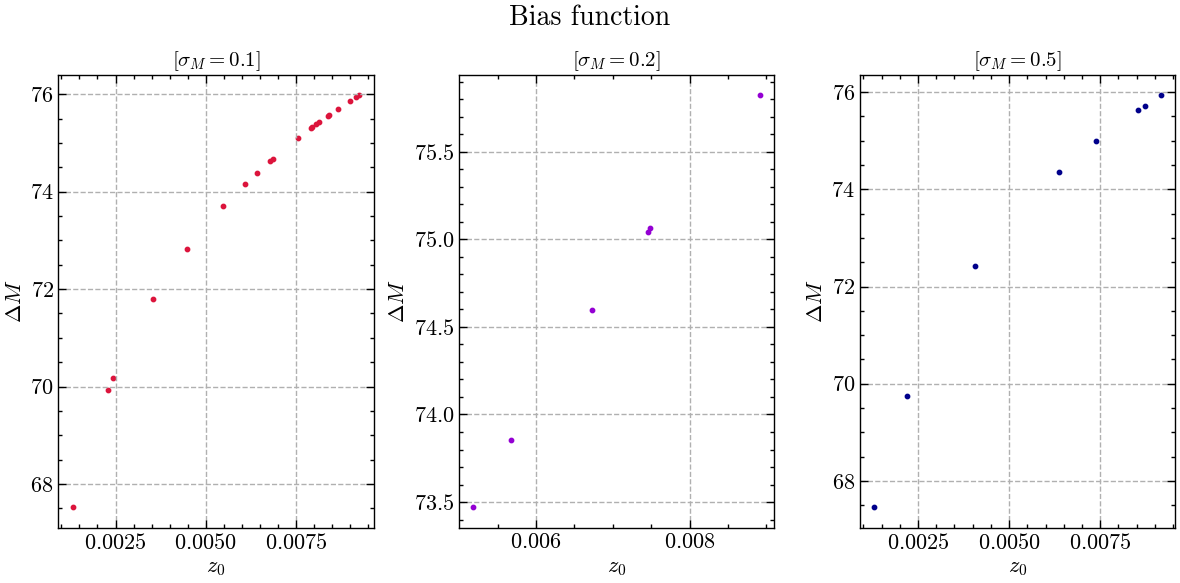

In [13]:
fig, ax = plt.subplots(1, 3, figsize = (12, 6))
fig.suptitle("Bias function", fontsize = 20)
#fig.supylabel(r"$\Delta$ M", fontsize = 15)

ax[0].scatter(z_1, M_bias_1, color = "crimson", s = 10)
ax[0].set_title(rf"[$\sigma_M = {sigma_M[0]}$]", fontsize = 15)
ax[0].set(xlabel = r"$z_0$", ylabel = r"$\Delta M$")
ax[0].grid(linestyle = "--")

ax[1].scatter(z_2, M_bias_2, color = "darkviolet", s = 10)
ax[1].set_title(rf"[$\sigma_M = {sigma_M[1]}$]", fontsize = 15)
ax[1].set(xlabel = r"$z_0$", ylabel = r"$\Delta M$")
ax[1].grid(linestyle = "--")

ax[2].scatter(z_3, M_bias_3, color = "darkblue", s = 10)
ax[2].set_title(rf"[$\sigma_M = {sigma_M[2]}$]", fontsize = 15)
ax[2].set(xlabel = r"$z_0$", ylabel = r"$\Delta M$")
ax[2].grid(linestyle = "--")

plt.tight_layout()
plt.show()
plt.close()

(g) Based on your results, at which redshift does selection bias become important in each case?

Selection bias becomes important as the redshift increases. We can see in our results, after applying the detection threshold and computing the bias function, that the bias increases with redshift. Bias in the three cases increase in a redshift range of 0.002 to 0.008 approximately. 